#### Import Pandas, Numpy, Seaborn, Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the csv

In [2]:
df=pd.read_csv('Data/Brain-Stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
df['age']=df['age'].astype('int') #converting age to int from float

In [5]:
df.shape

(4981, 11)

#### Check the categorical variables

In [6]:
categorical_var=[feature for feature in df.select_dtypes(include='O')]

In [7]:
for feature in categorical_var:
    print(f' unique values for {feature} are: {df[feature].unique()}')

 unique values for gender are: ['Male' 'Female']
 unique values for ever_married are: ['Yes' 'No']
 unique values for work_type are: ['Private' 'Self-employed' 'Govt_job' 'children']
 unique values for Residence_type are: ['Urban' 'Rural']
 unique values for smoking_status are: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


#### Remove the "unknown" smoking status as we cant use this in the application later on

In [8]:
df = df[df['smoking_status'] != 'Unknown']

#### Check for null values

In [9]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Check for imbalance

In [10]:
df['stroke'].value_counts()

0    3280
1     201
Name: stroke, dtype: int64

###### We are dropping these columns 

In [11]:
cols_to_drop = ['ever_married','work_type','Residence_type']
df.drop(cols_to_drop,axis=1,inplace=True)

#### We wil do label encoding on our categorical variables

In [12]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

df['smoking_status'] = enc.fit_transform(df['smoking_status'])

In [13]:
smdf = pd.get_dummies(df['gender'],drop_first=True)

In [14]:
newdf = pd.concat([df,smdf],axis=1)

In [15]:
newdf.drop(['gender'],axis=1,inplace=True)
newdf.rename(columns={'Male':'gender'},inplace=True)

In [16]:
newdf.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender
0,67,0,1,228.69,36.6,0,1,1
1,80,0,1,105.92,32.5,1,1,1
2,49,0,0,171.23,34.4,2,1,0
3,79,1,0,174.12,24.0,1,1,0
4,81,0,0,186.21,29.0,0,1,1


#### Shuffle the data

In [17]:
newdf = newdf.sample(frac=1)
newdf.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender
2694,51,0,0,107.42,20.2,0,0,1
3787,66,0,0,96.19,38.3,2,0,1
714,31,0,0,109.68,41.8,1,0,0
27,80,0,1,252.72,30.5,0,1,1
1360,31,0,0,77.23,25.9,2,0,1


#### Lets do some Visualization

###### First split the data into X and y (independent and dependent variables)

In [18]:
X = newdf.drop('stroke',axis=1)
y = newdf.stroke

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'hypertension'),
  Text(2, 0, 'heart_disease'),
  Text(3, 0, 'avg_glucose_level'),
  Text(4, 0, 'bmi'),
  Text(5, 0, 'smoking_status'),
  Text(6, 0, 'gender')])

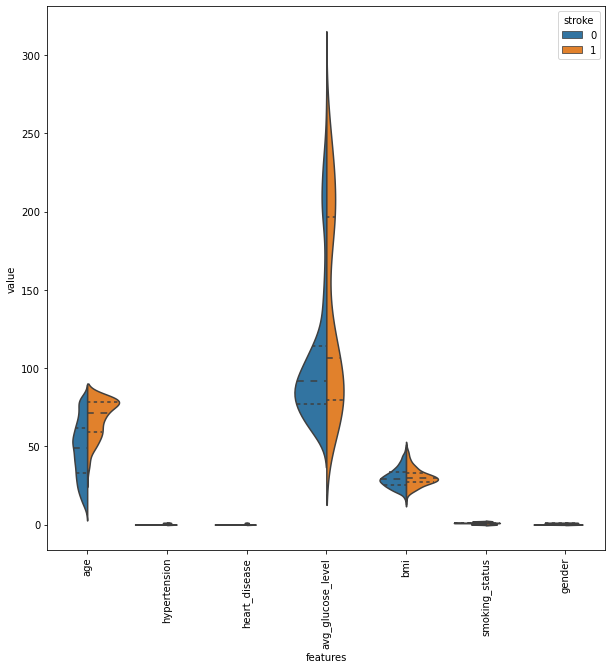

In [19]:
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2],axis=1)
data = pd.melt(newdf,id_vars="stroke",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="stroke", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

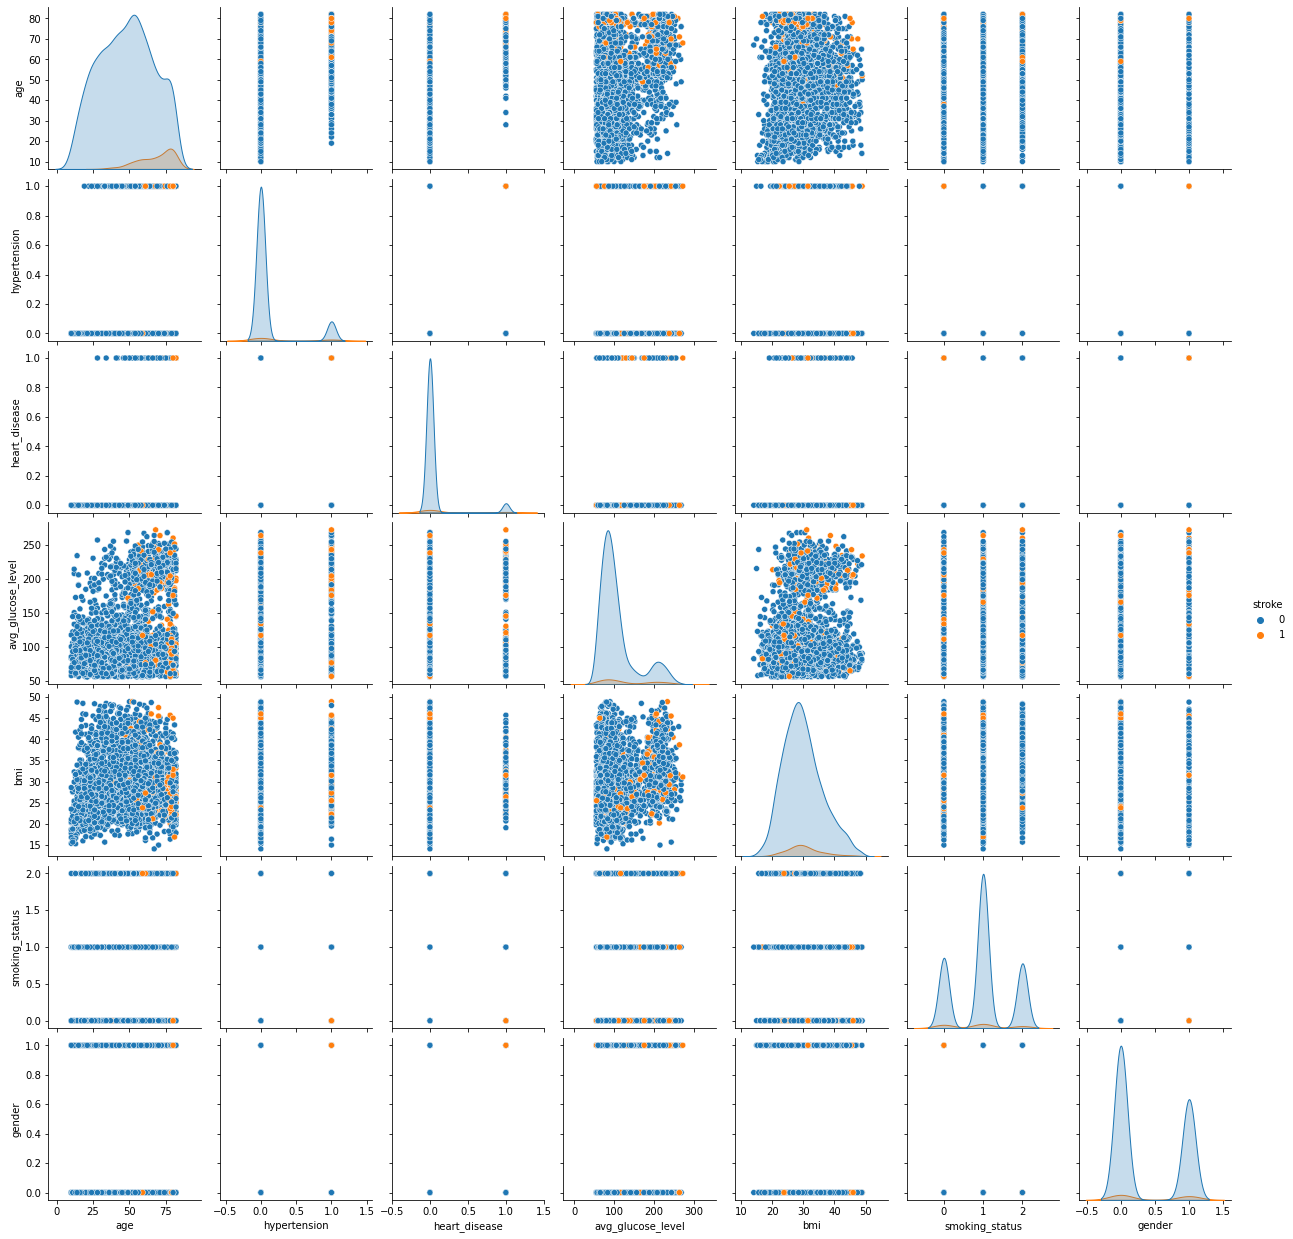

In [20]:
sns.pairplot(newdf,hue='stroke')

#### Check the correlations between variables

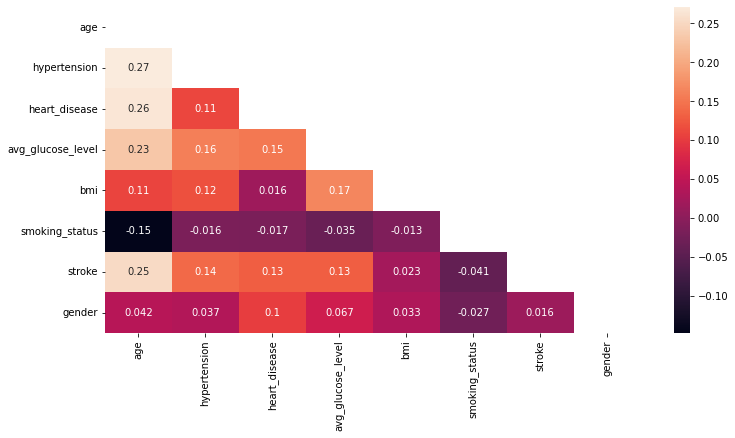

In [21]:
plt.figure(figsize=(12,6))
mask=np.triu(newdf.corr())

sns.heatmap(newdf.corr(),annot=True,mask=mask)
plt.show()

###### No multicollinearity and no collumn showing exact 0 correlation with target

#### Check for imbalance

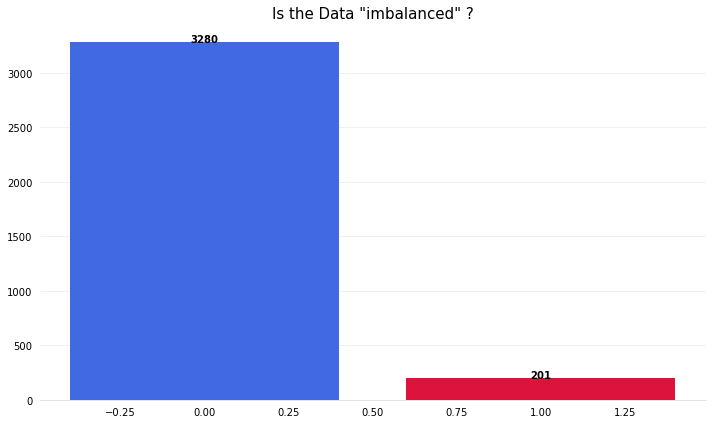

In [22]:
A=newdf['stroke'].value_counts().reset_index()

fig,ax=plt.subplots(figsize=(10,6))
bars = ax.bar(data=A,x='index',height='stroke',color=['royalblue','crimson'],)
ax.tick_params(bottom=False,left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.3,
        round(bar.get_height(), 1),
        color='black',
        horizontalalignment='center',
        weight='bold'
  )
plt.title('Is the Data "imbalanced" ?',fontsize=15)

fig.tight_layout()

###### Data is highly imbalaced so lets fix that first

In [23]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN(sampling_strategy='all')
X_sm,y_sm =sm.fit_resample(X,y)

In [24]:
from collections import Counter

print(Counter(y_sm))
print(Counter(y))

Counter({1: 2933, 0: 2390})
Counter({0: 3280, 1: 201})


#### Train-Test-Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=42)

#### Model training

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
random_state = 42


model1 = DecisionTreeClassifier(random_state=random_state)
model2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=random_state))
model3 = RandomForestClassifier(n_estimators=20,random_state=random_state)
model4 = GradientBoostingClassifier(random_state=random_state)
model5 = LogisticRegression(random_state=random_state, solver='lbfgs', max_iter=10000)
model6 = XGBClassifier(random_state = random_state)
model7 = SVC(random_state=random_state)
model8 = KNeighborsClassifier()
model9 = GaussianNB()



def make_classification(X_train, X_test, y_train, y_test):
    accuracy, f1,crossvalscore = [], [],[]

    

    ##classifiers
    classifiers = []
    classifiers.append(model1)
    classifiers.append(model2)
    classifiers.append(model3)
    classifiers.append(model4)
    classifiers.append(model5)
    classifiers.append(model6)
    classifiers.append(model7)
    classifiers.append(model8)
    classifiers.append(model9)

    for classifier in classifiers:
        # classifier and fitting
        clf = classifier
        clf.fit(X_train, y_train)

        # predictions
        y_preds = clf.predict(X_test)

        # metrics
        accuracy.append(((accuracy_score(y_test, y_preds))) * 100)
        f1.append(((f1_score(y_test, y_preds))) * 100)
        crossvalscore.append(np.mean(cross_val_score(clf,X_sm,y_sm,cv=5)))
        

    results_df = pd.DataFrame({"Accuracy Score": accuracy,
                               "f1 Score": f1,
                               'Cross_val_score':crossvalscore,
                               "ML Models": ["DecisionTree", "AdaBoost",
                                             "RandomForest", "GradientBoosting",
                                             "Logistic reg",'XGB',
                                             "SVC", "KNN","GNB"]})

    results = (results_df.sort_values(by=['Cross_val_score'], ascending=False)
               .reset_index(drop=True))

    return classifiers, results


classifiers, results = make_classification(X_train, X_test, y_train, y_test)

results

,Accuracy Score,f1 Score,Cross_val_score,ML Models
0,95.742016,96.171171,0.968437,KNN
1,95.178460,95.647258,0.965432,XGB
2,95.867251,96.250000,0.963366,AdaBoost
3,94.489668,95.022624,0.953220,RandomForest
4,94.301816,94.808899,0.950215,DecisionTree
5,89.918597,91.030641,0.904752,GradientBoosting
6,82.592361,83.967705,0.829981,Logistic reg
7,80.776456,82.078225,0.824532,GNB
8,82.154039,83.723587,0.823967,SVC


#### Lets see the classification report  for the 2 best models

In [33]:
y_pred2 = model2.predict(X_test)
y_pred8 = model8.predict(X_test)

from sklearn.metrics import classification_report
print('Report for ADB:')
print(classification_report(y_test,y_pred2))
print('Report for KNN:')
print(classification_report(y_test,y_pred8))


Report for ADB:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       738
           1       0.94      0.99      0.96       859

    accuracy                           0.96      1597
   macro avg       0.96      0.96      0.96      1597
weighted avg       0.96      0.96      0.96      1597

Report for KNN:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       738
           1       0.93      0.99      0.96       859

    accuracy                           0.96      1597
   macro avg       0.96      0.95      0.96      1597
weighted avg       0.96      0.96      0.96      1597



#### Lets test the models 

#### First stroke = 1 ('Stroke')

In [37]:
data= np.array([[80,0,1,252.72,30.5,0,1]])
prediction1 = model2.predict(data)
prediction2 = model8.predict(data)
print(prediction1)
print(prediction2)

[1]
[1]


F:\Conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
F:\Conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### Now stroke = 0 ('No stroke')

In [36]:
data= np.array([[1,48,1,0,1189,230,1]])
prediction = model2.predict(data)
prediction = model8.predict(data)
print(prediction)
print(prediction)

[0]
[0]


F:\Conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
F:\Conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [38]:
import pickle
pickle.dump(model2, open('strokeADB.pkl','wb'))           